# Clustering

![](https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('flights.csv')

In [3]:
df

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019
...,...,...,...,...,...,...,...,...,...,...
271883,135941,1339,Campo Grande (MS),Florianopolis (SC),firstClass,1446.34,1.49,573.81,CloudFy,07/12/2020
271884,135942,1339,Florianopolis (SC),Natal (RN),economic,726.95,1.84,709.37,CloudFy,07/16/2020
271885,135942,1339,Natal (RN),Florianopolis (SC),economic,873.07,1.84,709.37,CloudFy,07/20/2020
271886,135943,1339,Florianopolis (SC),Rio de Janeiro (RJ),economic,313.62,1.21,466.30,CloudFy,07/23/2020


In [8]:
df.isnull().sum()

travelCode    0
userCode      0
from          0
to            0
flightType    0
price         0
time          0
distance      0
agency        0
date          0
dtype: int64

In [9]:
clust_var=['price','time','distance']

In [10]:
data_clust=df[clust_var]

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scale = StandardScaler()

In [13]:
scaled_df = scale.fit_transform(data_clust)

In [21]:
scaled_df

array([[ 1.3165614 ,  0.62456747,  0.62041611],
       [ 0.92438475,  0.62456747,  0.62041611],
       [ 1.46323088,  0.4402491 ,  0.43382366],
       ...,
       [-0.23268677,  0.77202216,  0.77765746],
       [-1.77680124, -0.38918354, -0.38618715],
       [-1.16939527, -0.38918354, -0.38618715]])

In [22]:
from sklearn.cluster import KMeans

In [24]:
WSS = []
for i in range(1,12):
    m = KMeans(n_clusters=i)
    m = m.fit(scaled_df)
    WSS.append(m.inertia_)

/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/infinity/a

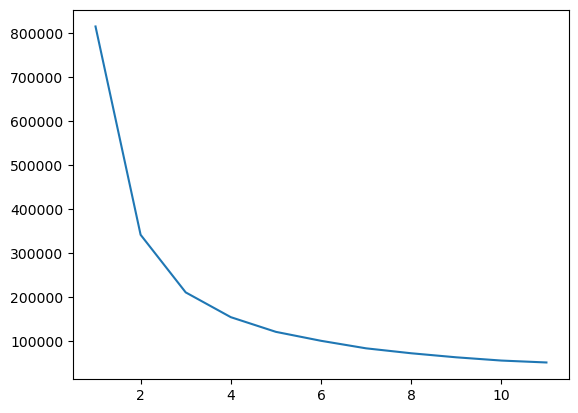

In [27]:
import matplotlib.pyplot as plt
x = list(range(1,12))
plt.plot(x,WSS,"-")

In [28]:
WSS

[815664.0000000047,
 342235.8781277306,
 211307.69711134292,
 154989.46124547263,
 121615.37315499748,
 101283.82287032696,
 84162.82002373258,
 72953.8614444864,
 63742.5756809906,
 56369.48411165953,
 52001.379216414876]

In [29]:
scaled_df['cluster_4'] = mod.labels_

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [31]:
data_clust

,price,time,distance
0,1434.38,1.76,676.53
1,1292.29,1.76,676.53
2,1487.52,1.66,637.56
3,1127.36,1.66,637.56
4,1684.05,2.16,830.86
...,...,...,...
271883,1446.34,1.49,573.81
271884,726.95,1.84,709.37
271885,873.07,1.84,709.37
271886,313.62,1.21,466.30


In [33]:
len(mod.labels_)

271888

In [34]:
data_clust['cluster_4'] = mod.labels_

/tmp/ipykernel_19923/3738499433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clust['cluster_4'] = mod.labels_


In [35]:
data_clust

,price,time,distance,cluster_4
0,1434.38,1.76,676.53,0
1,1292.29,1.76,676.53,0
2,1487.52,1.66,637.56,0
3,1127.36,1.66,637.56,0
4,1684.05,2.16,830.86,3
...,...,...,...,...
271883,1446.34,1.49,573.81,0
271884,726.95,1.84,709.37,1
271885,873.07,1.84,709.37,1
271886,313.62,1.21,466.30,1


# Cluster Profiling

In [36]:
data_clust.groupby('cluster_4').mean()

,price,time,distance
cluster_4,,,
0,1288.618413,1.589760,611.847532
1,748.293333,1.440549,554.507723
2,626.687722,0.647388,249.006855
3,1286.123471,2.201788,847.459518


In [37]:
data_clust.describe()

,price,time,distance,cluster_4
count,271888.00000,271888.000000,271888.000000,271888.000000
mean,957.37503,1.421147,546.955535,1.320930
std,362.31189,0.542541,208.851288,1.049888
min,301.51000,0.440000,168.220000,0.000000
25%,672.66000,1.040000,401.660000,0.000000
50%,904.00000,1.460000,562.140000,1.000000
75%,1222.24000,1.760000,676.530000,2.000000
max,1754.17000,2.440000,937.770000,3.000000


In [38]:
from sklearn.cluster import KMeans
WSS = []
for i in range(1,12):
    m = KMeans(n_clusters=i)
    m = m.fit(scaled_df)
    WSS.append(m.inertia_)

/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/infinity/a

In [39]:
WSS

[815664.0000000047,
 342235.8781277307,
 211307.6971113429,
 154984.0267293071,
 121615.37315499746,
 101283.82287032699,
 84162.82002373258,
 73088.01150316489,
 63450.68648841296,
 56322.55178567948,
 52619.722933049445]